# Невронски мрежи

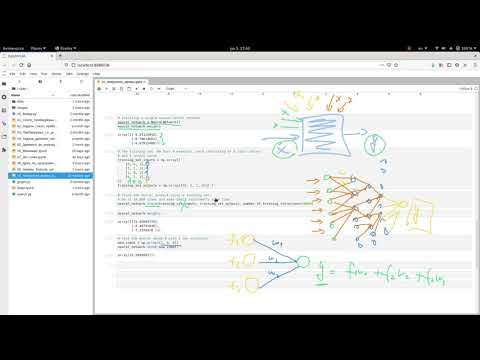

In [2]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('ZaEwXhTowQs')

## Референци
- [Невронски мрежи - Грант Сандерсон](https://www.3blue1brown.com/neural-networks)
- [Невронски мрежи - Филип](https://www.dropbox.com/sh/hqkdhoolkndhh1r/AADSs2IXU7KvFfxNlVBPXmTEa?dl=0)
- [Тетратка за невронски мрежи - Филип](https://e-kursevi.feit.ukim.edu.mk/mod/folder/view.php?id=13337)

In [48]:
import numpy as np
from plotly import graph_objects as go

In [49]:
class NeuralNetwork:
    def __init__(self):
        # We model a single neuron, with 3 input connections and 1 output connection.
        # We assign random weights to a 3 x 1 matrix, with values in the range -1 to 1
        # and mean 0.
        self.weights = 2 * np.random.random((3, 1)) - 1

    # The Sigmoid function, which describes an S shaped curve.
    # We pass the weighted sum of the inputs through this function to
    # normalise them between 0 and 1.
    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    # The derivative of the Sigmoid function.
    # This is the gradient of the Sigmoid curve.
    # It indicates how confident we are about the existing weight.
    @staticmethod
    def sigmoid_derivative(x):
        return x * (1 - x)

    # We train the neural network through a process of trial and error.
    # Adjusting the weights each time.
    def train(self, training_set_inputs, training_set_outputs, alpha, number_of_training_iterations):
        for iteration in range(number_of_training_iterations):
            # Pass the training set through our neural network (a single neuron).
            output = self.predict(training_set_inputs)

            # Calculate the error (The difference between the desired output
            # and the predicted output).
            error = training_set_outputs - output

            # Multiply the error by the input and again by the gradient of the Sigmoid curve.
            # This means less confident weights are adjusted more.
            # This means inputs, which are zero, do not cause changes to the weights.
            adjustment = np.dot(training_set_inputs.T, error * self.sigmoid_derivative(output))

            # Adjust the weights.
            self.weights += alpha * adjustment

    # The neural network thinks.
    def predict(self, inputs):
        # Pass inputs through our neural network (our single neuron).
        return self.sigmoid(np.dot(inputs, self.weights))

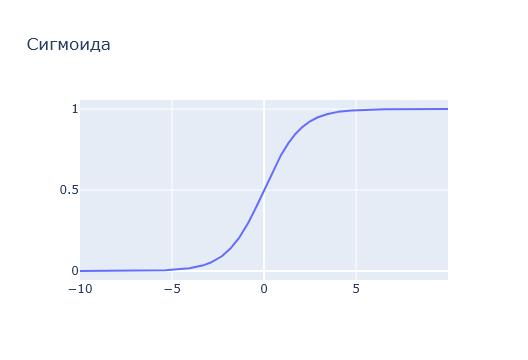

In [50]:
x = np.arange(-10, 10, 0.01)
y = NeuralNetwork.sigmoid(x)

fig = go.Figure(layout_title='Сигмоида')
fig.add_scatter(x=x, y=y)

In [51]:
# Intialise a single neuron neural network.
neural_network = NeuralNetwork()
neural_network.weights

array([[0.70223865],
       [0.29546347],
       [0.53542798]])

In [52]:
# The training set. We have 4 examples, each consisting of 3 input values
# and 1 output value.
training_set_inputs = np.array([
    [0, 0, 1],
    [1, 1, 1],
    [1, 0, 1],
    [0, 1, 1],
])
training_set_outputs = np.array([
    [0],
    [1],
    [1],
    [0],
])

In [53]:
# Train the neural network using a training set.
# Do it 10,000 times and make small adjustments each time.
neural_network.train(training_set_inputs, training_set_outputs, alpha=0.01, number_of_training_iterations=10000)

In [54]:
neural_network.weights

array([[ 4.60047658],
       [-0.26174473],
       [-2.04759243]])

In [55]:
# Test the neural network with a new situation.
new_input = np.array([1, 0, 0])
neural_network.predict(new_input)

array([0.99005289])

## Задача 6.60

![Задача 6.60](images/exercise_6_60.png)

### Решение

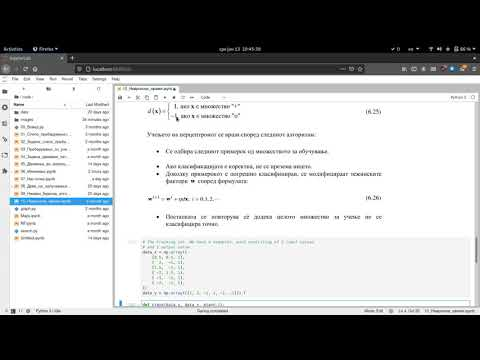

In [56]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('sV_Qp82TOCU')

In [63]:
data_x = np.array([
    [0.5, 0.5, 1],
    [  2,  -1, 1],
    [1.5,  -2, 1],
    [ -2, 1.5, 1],
    [ -1,  -1, 1],
    [ -2,  -1, 1],
])
data_y = np.array([[1, 1, -1, 1, -1, -1]]).T

In [64]:
def train(data_x, data_y, eta=0.2, n_iterations=100):
    w = np.array([1, 0.5, 0])
    for n in range(n_iterations):
        for x, y in zip(data_x, data_y):
            prediction = 1 if np.dot(w, x) > 0 else -1
            if prediction != y[0]:
                w = w + eta * y[0] * x
    return w

w = train(data_x, data_y)
w

array([0.7, 1. , 0.2])

In [ ]:
##Задача 6.60


In [63]:
data_x = np.array([
    [0.5, 0.5, 1],
    [2,-1, 1],
    [1.5, -2, 1],
    [-2, 1.5, 1],
    [-1, -1, 1],
    [-2, -1, 1],
])
data_y = np.array([[1, 1, -1, 1, -1, -1]]).T

In [64]:
data_x

array([[ 0.5,  0.5,  1. ],
       [ 2. , -1. ,  1. ],
       [ 1.5, -2. ,  1. ],
       [-2. ,  1.5,  1. ],
       [-1. , -1. ,  1. ],
       [-2. , -1. ,  1. ]])

In [61]:
data_y

array([[ 1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [-1]])

In [74]:
def train(data_x, data_y, eta = 0.2, n_iterations = 10):
    w = np.array([1, 0.5, 0])
    for n in range(n_iterations):
        for x, y in zip(data_x, data_y):
            prediction = 1 if np.dot(w, x) > 0 else -1
            if prediction != y:
                w = w + eta * y[0] * x
    return w
            


w = train(data_x, data_y)

In [ ]:
np.dot(w, np.array([-2, 1.5, 1]))